### Exploratory Data Analysis (EDA):
According to Sahoo *et al*. (2019, p.4727), Exploratory Data Analysis can describe the data sets, such as several rows/columns, missing data, data types, and so on, inclusively cleaning corrupted data. Besides that, measures of mean, mode, median, standard deviation, variance, distribution and the existence of outliers are essential aspects of the EDA. (Sahoo *et al*., 2019, p.4727; Sagala and Aryatama, 2022, p.579)

Exploratory Data Analysis is helpful to increase the understanding of the dataset because it analyses and summarize the main characteristics of the dataset and also by using data visualization such as Histograms, Box plot, Scatter plots and others (Sagala and Aryatama, 2022, p.579).


### Characterisation of the dataset:
Data Characterization is part of Exploratory Data Analysis (EDA); it describes the data and can be referenced as metadata ("data about data"), which is the data characteristics, for example, data type, size, distribution and pattern. (Panzner *et al*., 2022, p.7) The purpose of the data characterization is to examine and understand the fundamental characteristics and properties of a dataset to gain insights about the data.

To start the EDA I will import the Pandas library to use the functions and methods to manipulated the data in this library, and then I imported the Numpy to solve matematical problems.

In [1]:
import pandas as pd
import numpy as np

I used the 'pd.read_csv' method to access the file that I want to work with.

In [2]:
df = pd.read_csv("aps_failure_set.csv")

I used the 'head' method to view the file.

In [3]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


I used the methop df.shape to have an idea of the dataset size. And I found that this dataset has 60000 rows and 171 columns.

In [4]:
df.shape

(60000, 171)

With the describe() method, I can see that this dataset is skewed by comparing the values of mean and median (50% value). Thus, I will start the cleaning process but take care not to distort the data. 

In [5]:
df.describe()

,aa_000
count,6.000000e+04
mean,5.933650e+04
std,1.454301e+05
min,0.000000e+00
25%,8.340000e+02
50%,3.077600e+04
75%,4.866800e+04
max,2.746564e+06


### Cleaning the dataset

The method df.info() gave me an idea about the values inside the dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB


After run the df.info() method I realized that the dataset has 170 features denominated as object which means that in this feature there are values that are string or sinalized a 'NaN' by the programm for unkown values.

I used the unique() method to obtain all kind of data that there is inside de column "class". As a result is showed that I have strings in this column with two types: 'neg' and 'pos'. 

In [7]:
df["class"].unique()

array(['neg', 'pos'], dtype=object)

The function miss_val_formats call a list of strings that have some possible formats that might be used to indicate missing or invalid data in the dataset. Then the code below will search on the entire dataset for all the data that are in the list 'miss_val_formats' which may represent missing or invalid data and place them with 'NaN', which means not a number.

In [8]:
miss_val_formats = ["n.a.", "?", "NA", "n/a", "na", "--"]

In [9]:
df = pd.read_csv("aps_failure_set.csv", na_values=miss_val_formats)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 78.3+ MB


In [11]:
df.dtypes

class      object
aa_000      int64
ab_000    float64
ac_000    float64
ad_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 171, dtype: object

After run the method info() again I saw that the data types has changed. There are float, integer, and object (string), because probably there was missing or invalid data that was changing columns with float values in string columns.

Now I am using the code df.isnull().sum() to calculate the numbers of missing (null and NaN) values in all columns of the dataset. As result I found that there a lot of missing values, for example in the column ab_000 there are 46329 records missing (null and NaN). 
Considering that this dataset has a huge amount of missing values I will not allowed to use the code df.dropna(axis=0) because if I do it I will lose the confiability on the information that this dataset might have.
Just for instance if I follow this pathway I will get a dataset with only 591 rows, which means that I would lose more than 99% of the dataset.

In [12]:
df.isnull().sum()

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64

In [13]:
new_df = df.dropna(axis=0)

In [14]:
new_df.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

In [15]:
new_df.shape

(591, 171)

Above is shown that after proceeding that pathway I ended up with only 591 records (rows). In this case I wil use another solution to replace those missing values.

When I repeated the process above, I saw that instead of the dataset having 171 columns, it became only 2 columns, meaning that 169 were deleted from the dataset.

In [16]:
df.shape

(60000, 171)

In [17]:
new_df = df.dropna(axis=1)

In [18]:
new_df.shape

(60000, 2)

Now I will again access the original dataframe (df) and apply the fillna method to replace all missing data.

In [19]:
df.shape

(60000, 171)

In [20]:
df.describe()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,13671.000000,5.666500e+04,4.513900e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,...,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
mean,5.933650e+04,0.713189,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,8.859128e+04,...,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,1.454301e+05,3.478962,7.948749e+08,4.040441e+07,161.543373,209.792592,2.047846e+04,3.420053e+04,1.503220e+05,7.617312e+05,...,1.155540e+06,5.433188e+05,1.168314e+06,1.121044e+06,1.069160e+06,1.728056e+06,4.495100e+05,4.747043e+04,4.368855,8.830641
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.340000e+02,0.000000,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.936000e+03,1.166000e+03,2.700000e+03,3.584000e+03,5.120000e+02,1.100000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.077600e+04,0.000000,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,4.866800e+04,0.000000,9.640000e+02,4.300000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.383960e+05,2.182320e+05,4.666140e+05,4.032220e+05,2.750940e+05,1.678140e+05,1.397240e+05,2.028000e+03,0.000000,0.000000
max,2.746564e+06,204.000000,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,6.340207e+07,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


### Inputing data with median values

According to df.describe(), we can see that the data is skewed. Therefore, it is recommended to use the **median** to replace missing values, as it provides a better representation of the majority of the variable's values. In contrast, the mean is influenced by values at the extreme of the distribution.

In [21]:
new2_df = df.fillna(df.median())

C:\Users\danie\AppData\Local\Temp\ipykernel_25572\1783691513.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  new2_df = df.fillna(df.median())


In [22]:
new2_df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,0.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.0,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,0.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [23]:
new2_df.shape

(60000, 171)

In [24]:
new2_df.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

In [25]:
new2_df.shape

(60000, 171)

In [26]:
new2_df.describe()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,60000.000000,6.000000e+04,6.000000e+04,60000.000000,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,...,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,60000.000000
mean,5.933650e+04,0.162500,3.362258e+08,1.434383e+05,6.535000,10.548200,2.191577e+02,9.648104e+02,8.509771e+03,8.760054e+04,...,4.431223e+05,2.100188e+05,4.432268e+05,3.916653e+05,3.303672e+05,3.428586e+05,1.372212e+05,8.295099e+03,0.086467,0.203100
std,1.454301e+05,1.687318,7.767625e+08,3.504525e+07,158.147893,205.387115,2.036364e+04,3.400891e+04,1.494818e+05,7.575171e+05,...,1.149276e+06,5.403725e+05,1.162002e+06,1.114964e+06,1.063465e+06,1.718666e+06,4.472145e+05,4.721249e+04,4.268570,8.628043
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.340000e+02,0.000000,2.000000e+01,4.200000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.033500e+03,1.204000e+03,2.848500e+03,3.839000e+03,5.600000e+02,1.180000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.077600e+04,0.000000,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,4.866800e+04,0.000000,8.480000e+02,2.920000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.350315e+05,2.164440e+05,4.624655e+05,4.003010e+05,2.725220e+05,1.663465e+05,1.367255e+05,1.934000e+03,0.000000,0.000000
max,2.746564e+06,204.000000,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,6.340207e+07,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


In [27]:
new2_df.shape

(60000, 171)

### Inputing data with interpolation values

After replacing the missing values with the median of each variable, there were no more null or missing values, but the variables remained skewed.
However, variables like 'ab_000' and 'ef_000' have shown values so far from the original dataset, meaning that the input with median was less effective than I imagined.  
In this case, it will be necessary to use **Interpolation**, which performs linear Interpolation on missing data points.

In [28]:
df.shape

(60000, 171)

In [29]:
df_new3 = df.interpolate(method="linear", direction="forward")

In [30]:
df_new3.describe()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,59997.000000,6.000000e+04,6.000000e+04,60000.000000,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,...,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,60000.000000
mean,5.933650e+04,0.701035,3.565030e+08,1.435263e+05,6.886533,11.100517,2.203502e+02,9.691852e+02,8.571722e+03,8.844413e+04,...,4.453309e+05,2.110075e+05,4.454135e+05,3.935807e+05,3.327470e+05,3.455027e+05,1.386618e+05,8.386621e+03,0.090400,0.211217
std,1.454301e+05,2.650264,7.837943e+08,3.504525e+07,160.644593,208.515341,2.036531e+04,3.401127e+04,1.495479e+05,7.589686e+05,...,1.152805e+06,5.421643e+05,1.164657e+06,1.116694e+06,1.065782e+06,1.720842e+06,4.487702e+05,4.736593e+04,4.321733,8.660519
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.340000e+02,0.000000,1.800000e+01,3.200000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.992000e+03,1.192000e+03,2.790000e+03,3.751500e+03,5.420000e+02,1.160000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.077600e+04,0.000000,1.620000e+02,1.500000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.341870e+05,1.122220e+05,2.219390e+05,1.906900e+05,9.407350e+04,4.185700e+04,4.129000e+03,0.000000e+00,0.000000,0.000000
75%,4.866800e+04,0.800000,1.042000e+03,4.460000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.386280e+05,2.183070e+05,4.666820e+05,4.031165e+05,2.749965e+05,1.676955e+05,1.397620e+05,2.062500e+03,0.000000,0.000000
max,2.746564e+06,204.000000,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,6.340207e+07,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


In [31]:
df_new3.isnull().sum()

class     0
aa_000    0
ab_000    3
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

When I compare the descriptive parameters between the original dataset (df) and the dataset with interpolation values (df_new3), I see that these parameters are still similar, but with the advantage that the missing values are only present in a few rows.
Now, I will drop these values without losing the meaning of the dataset.
Below, you can see that I only removed 13 rows, less than 0.1% of the total amount of the dataset, which is insignificant.

In [32]:
df_new4 = df_new3.dropna(axis=0)

In [33]:
df_new4.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

In [34]:
df_new4.shape

(59987, 171)

I will use the duplicated() method to eliminate records that may be duplicated. However in this dataset there is no duplicates as we can see below.

In [35]:
df_new4.duplicated().sum()

0

I used the value_counts() method to find out how many observations we have in each of these classes, positive and negative.
As we can see, we have 999 records for positive class, meaning that occurrences are related to a failure in components specifics of the APS system. In contrast, the remainder, 58988 records (negative), means that the truck's failure in components is unrelated to the APS system. In other words, approximately 98% of the component failures are not due to the APS system.

In [36]:
df_new4["class"].value_counts()

neg    58988
pos      999
Name: class, dtype: int64

I will import the Seaborn data visualization library to make the histogram; thus, that difference will be more evident.

In [37]:
import seaborn as sns

<Axes: xlabel='class', ylabel='Count'>

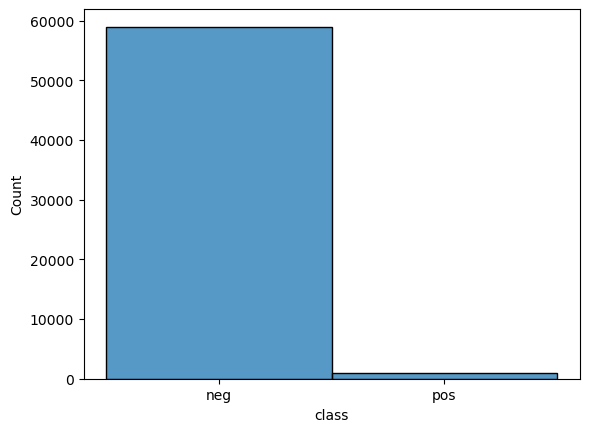

In [38]:
sns.histplot(data=df_new4, x="class")

### Calculating the sparsity of the dataset

Sparsity is a measurement of how sparse or dense a dataset is. It can be represented as the ratio of the number of zero or missing values to the total number of data points or entries in the dataset. Below we can see 

In [40]:
missing_values = df_new4.isnull().sum().sum()
zero_values = (df_new4 == 0).sum().sum()

total_data_points = df_new4.size

sparsity = (missing_values + zero_values) / total_data_points

print(f"Sparsity of the dataset: {sparsity:.3f}")

Sparsity of the dataset: 0.338


The sparsity values must be between 0 and 1 when 0 indicates no sparsity, and 1 indicates completely spaced. The result for this dataset was found to be 0.34, meaning that 34% of the dataset is sparse and has a significant portion of missing or zero values. As I input the missing values with interpolation values, I can rationalise that the zero values are contributing to the sparsity. However, another point that needs to be considered is the **"Curse of Dimensionality"**.

## References

Melina Panzner et al. (2022) ‘Characterization of Usage Data with the Help of Data Classifications’, Journal of the Knowledge Economy [Preprint]. Available at: https://search.ebscohost.com/login.aspx?direct=true&db=edsair&AN=edsair.doi...........8017c54a020b9debf67ec56928155640&site=eds-live&scope=site (Accessed: 25 October 2023).

Noviyanti T M Sagala and Fonggi Yudi Aryatama (2022) ‘Exploratory Data Analysis (EDA): A Study of Olympic Medallist’, Sistemasi: Jurnal Sistem Informasi, 11(3), pp. 578–587. doi:10.32520/stmsi.v11i3.1857.

Kabita Sahoo *et al*. (2019) “Exploratory Data Analysis using Python,” Int. J. Innov. Technol. Explor. Eng., vol. 8, no. 12, pp. 4727–4735, 